In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Load the CSV data into a DataFrame
data = pd.read_csv('consolidated_muitimodel_features_L1.csv')

In [3]:
data.head()

,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,BF9,BF10,...,FF15,FF16,FF17,FF18,FF19,FF20,FF21,FF22,FF23,label
0,0.520532,0.371067,0.472170,0.390838,0.292039,0.413435,0.044622,0.678943,1.000001,1.000001,...,0.434624,0.343060,0.000065,0.118475,0.985221,1.335959e-06,-70.141103,-1.304535,-7.499232,0
1,0.000001,0.000001,0.000001,0.000001,0.266229,0.373001,0.066236,0.764186,0.290696,0.894581,...,0.823287,0.624990,0.248707,0.804156,0.830855,4.838982e-08,-34.938633,55.350706,12.182323,0
2,0.533891,0.461944,0.478577,0.489047,0.290990,0.409997,0.028048,0.649405,0.196395,0.754428,...,0.122684,0.718189,0.006283,0.011310,0.448108,4.034231e-05,-33.387659,13.838012,20.289297,0
3,0.551083,0.479474,0.493723,0.503577,0.301975,0.356861,0.052868,0.602087,0.225768,0.724701,...,0.529281,0.146233,0.027507,0.653014,0.994324,1.873196e-03,-32.512312,29.600823,4.233699,0
4,0.509558,0.387582,0.485777,0.387582,0.277698,0.488554,0.044848,0.755917,0.300488,0.821335,...,0.165180,0.235198,0.002606,0.022278,0.658321,1.277089e-06,-49.380323,-19.922609,-22.094104,0


In [4]:
data1 = data.sample(frac = 1)

In [5]:
data1.head()

,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,BF9,BF10,...,FF15,FF16,FF17,FF18,FF19,FF20,FF21,FF22,FF23,label
6795,0.408186,0.625272,0.378068,0.826117,0.143401,0.847804,0.000001,0.000001,1.000001,1.000001,...,0.603972,0.176415,0.898586,0.768563,0.249128,4.240656e-07,0.937000,1.434036,-6.516444,3
9420,0.535168,0.385598,0.484187,0.597466,0.135819,0.598979,0.000001,0.000001,1.000001,1.000001,...,0.830610,0.333492,0.982110,0.555154,0.007616,2.437719e-03,-1.185154,11.641846,30.464378,4
9290,0.425450,0.377344,0.517043,0.603287,0.138459,0.601673,0.232087,1.019668,0.280937,0.754992,...,0.564124,0.678262,0.386535,0.482697,0.254137,2.527707e-07,-7.491005,-0.715313,0.923619,4
8151,0.369676,0.592326,0.496755,0.666755,0.281273,0.738084,0.067633,0.907617,0.412035,0.933461,...,0.349073,0.174871,0.230579,0.461218,0.752910,2.842648e-08,3.178285,5.326247,-7.268564,3
5011,0.529510,0.332330,0.472060,0.470951,0.179819,0.469975,0.062422,0.837030,0.297215,0.767719,...,0.659805,0.186817,0.001428,0.084600,0.992329,2.184283e-08,-54.986918,-14.421248,0.309627,2


In [6]:
# Extract features (X) and labels (y)
X = data1.iloc[:, :-1]  # Assuming the features are in the first columns
y = data1.iloc[:, -1]   # Assuming the labels are in the last column

In [7]:
print(X.shape)

(11568, 93)


In [8]:
print(y.shape)

(11568,)


In [9]:
# Apply label encoding to convert class labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
y_encoded

array([3, 4, 4, ..., 3, 0, 1])

In [11]:
# Apply one-hot encoding to create binary columns for each class
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

In [12]:
# Print the shapes of the preprocessed data
print("Features shape:", X.shape)
print("Encoded labels shape:", y_encoded.shape)
print("One-hot encoded labels shape:", y_onehot.shape)

Features shape: (11568, 93)
Encoded labels shape: (11568,)
One-hot encoded labels shape: (11568, 5)


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sn
import os
#from keras.models import Sequential
#from keras.layers import Dense
%matplotlib inline

In [15]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(y_onehot.shape[1], activation='softmax')
])

2023-05-18 04:41:32.585690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 04:41:32.592454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 04:41:32.593174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 04:41:32.594384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               24064     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [18]:
# Train the model
his=model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
 62/463 [===>..........................] - ETA: 1s - loss: 1.4209 - accuracy: 0.3972

2023-05-18 04:41:36.634681: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


463/463 [==============================] - 2s 3ms/step - loss: 1.0521 - accuracy: 0.5977 - val_loss: 0.6614 - val_accuracy: 0.7553
Epoch 2/200
463/463 [==============================] - 1s 3ms/step - loss: 0.6494 - accuracy: 0.7623 - val_loss: 0.3556 - val_accuracy: 0.8698
Epoch 3/200
463/463 [==============================] - 1s 3ms/step - loss: 0.5602 - accuracy: 0.8014 - val_loss: 0.3126 - val_accuracy: 0.8957
Epoch 4/200
463/463 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.8295 - val_loss: 0.2416 - val_accuracy: 0.9173
Epoch 5/200
463/463 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8499 - val_loss: 0.2471 - val_accuracy: 0.9125
Epoch 6/200
463/463 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8586 - val_loss: 0.2209 - val_accuracy: 0.9238
Epoch 7/200
463/463 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8582 - val_loss: 0.2242 - val_accuracy: 0.9233
Epoch 8/200

463/463 [==============================] - 1s 3ms/step - loss: 0.2055 - accuracy: 0.9329 - val_loss: 0.0847 - val_accuracy: 0.9719
Epoch 59/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1881 - accuracy: 0.9366 - val_loss: 0.0897 - val_accuracy: 0.9687
Epoch 60/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1971 - accuracy: 0.9331 - val_loss: 0.1003 - val_accuracy: 0.9643
Epoch 61/200
463/463 [==============================] - 1s 3ms/step - loss: 0.2013 - accuracy: 0.9279 - val_loss: 0.0822 - val_accuracy: 0.9762
Epoch 62/200
463/463 [==============================] - 1s 3ms/step - loss: 0.2058 - accuracy: 0.9299 - val_loss: 0.0799 - val_accuracy: 0.9719
Epoch 63/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1974 - accuracy: 0.9344 - val_loss: 0.0847 - val_accuracy: 0.9708
Epoch 64/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.9322 - val_loss: 0.0752 - val_accuracy: 0.9746
Epoch

Epoch 115/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1620 - accuracy: 0.9458 - val_loss: 0.0752 - val_accuracy: 0.9784
Epoch 116/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1618 - accuracy: 0.9434 - val_loss: 0.0683 - val_accuracy: 0.9811
Epoch 117/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1570 - accuracy: 0.9450 - val_loss: 0.0742 - val_accuracy: 0.9768
Epoch 118/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1507 - accuracy: 0.9457 - val_loss: 0.0776 - val_accuracy: 0.9746
Epoch 119/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1501 - accuracy: 0.9499 - val_loss: 0.0671 - val_accuracy: 0.9789
Epoch 120/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1605 - accuracy: 0.9465 - val_loss: 0.0756 - val_accuracy: 0.9762
Epoch 121/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1549 - accuracy: 0.9465 - val_loss: 0.0684 - val_ac

463/463 [==============================] - 1s 3ms/step - loss: 0.1529 - accuracy: 0.9464 - val_loss: 0.0690 - val_accuracy: 0.9773
Epoch 172/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9538 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 173/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1375 - accuracy: 0.9539 - val_loss: 0.0725 - val_accuracy: 0.9800
Epoch 174/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1480 - accuracy: 0.9499 - val_loss: 0.0714 - val_accuracy: 0.9816
Epoch 175/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1341 - accuracy: 0.9537 - val_loss: 0.0720 - val_accuracy: 0.9800
Epoch 176/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 0.9515 - val_loss: 0.0830 - val_accuracy: 0.9762
Epoch 177/200
463/463 [==============================] - 1s 3ms/step - loss: 0.1320 - accuracy: 0.9542 - val_loss: 0.0707 - val_accuracy: 0.9789

In [19]:
# Graph section
def smooth_curve(points, factor=0.6):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    train_acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    train_loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])
    
    epochs = range(len(train_acc))
    
    plt.figure(figsize=(6, 4))
    plt.grid()
    plt.plot(epochs,train_loss,'r', label='Train Loss')
    plt.plot(epochs,val_loss,'b', label='Val Loss')
    #plt.xticks(range(0, len(loss), 5))
    #plt.xlim(0, len(loss))
    plt.ylabel('Loss',fontsize=12)
    plt.xlabel('Number of epochs')
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (train_loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    #plt.savefig(path+"_Loss.png",transparent=False,bbox_inches='tight')
    
    plt.figure(figsize=(6, 4))
    plt.grid()
    plt.plot(epochs,train_acc,'r',label='Train Acc')
    plt.plot(epochs,val_acc,'b', label='Val Acc')
    #plt.xticks(range(0, len(acc), 5))
    #plt.xlim(0, len(acc))
    plt.ylabel('Accuracy',fontsize=12)
    plt.xlabel('Number of epochs')
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (train_acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    #plt.savefig(path+"_Accuracy.png",transparent=False,bbox_inches='tight')

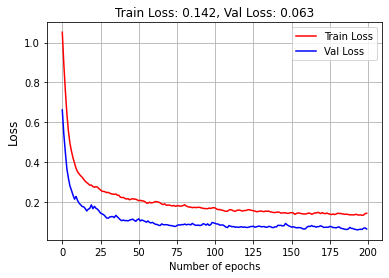

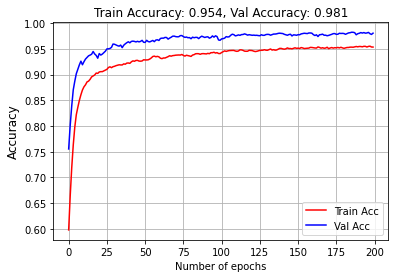

In [20]:
plot_compare(history=his)

In [21]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

73/73 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9831
Test accuracy: 0.983146071434021


In [23]:
from sklearn.metrics import classification_report

# Assuming you have already trained your neural network model and obtained the predictions
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Convert the true labels back from one-hot encoded format
y_true_labels = label_encoder.inverse_transform(y_test.argmax(axis=1))

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))

73/73 [==============================] - 0s 906us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       315
           1       0.97      0.99      0.98       483
           2       1.00      0.99      0.99       502
           3       1.00      0.98      0.99       512
           4       0.96      0.98      0.97       502

    accuracy                           0.98      2314
   macro avg       0.98      0.98      0.98      2314
weighted avg       0.98      0.98      0.98      2314



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your binary classification model and obtained the predicted probabilities
y_pred_prob = model.predict(X_test)

# Extract the probabilities for the positive class (assuming binary classification)
y_pred_prob_positive = y_pred_prob[:, 0]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

73/73 [==============================] - 0s 840us/step


ValueError: multilabel-indicator format is not supported